### This notebook consist some visulisations and mainly focused on Daily returns of bitcoin prices, gold prices ,sp500 and oil prices. Here we Apply ARMAX model and forecast the bitcoin daily return.

In [1]:
import pyforest
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../Data/dataset_final.csv')
df.set_index(pd.to_datetime(df.date),inplace=True)
df.drop(['Unnamed: 0','date'],axis=1,inplace=True)
df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,btc_price,gold_price,oil_wti_price,sp500_close,btc_num_trans,btc_google_search,btc_dr,gold_dr,oil_dr,sp500_dr,BVOL,GVOL,OVOL,VIX
date,,,,,,,,,,,,,,
2015-01-15,211.91,1352.8,46.37,1992.67,102309.0,3,0.568670,0.021141,-0.044705,-0.009291,0.853974,0.344132,0.344950,22.39
2015-01-16,199.46,1364.9,48.49,2019.42,104699.0,3,-0.060548,0.008905,0.044705,0.013335,0.857286,0.348453,0.346061,20.95
2015-01-20,208.00,1377.4,46.79,2022.55,98485.0,3,0.041924,0.009116,-0.035688,0.001549,0.857176,0.348518,0.346647,19.89
2015-01-21,225.51,1378.4,47.85,2032.12,98485.0,3,0.080826,0.000726,0.022402,0.004720,0.893605,0.350149,0.347336,18.85
2015-01-22,226.32,1390.2,45.93,2063.15,93698.0,3,0.003585,0.008524,-0.040953,0.015154,0.904949,0.351242,0.343230,16.40


## Historical volatility of Bitcoin, Gold, Oil Price

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

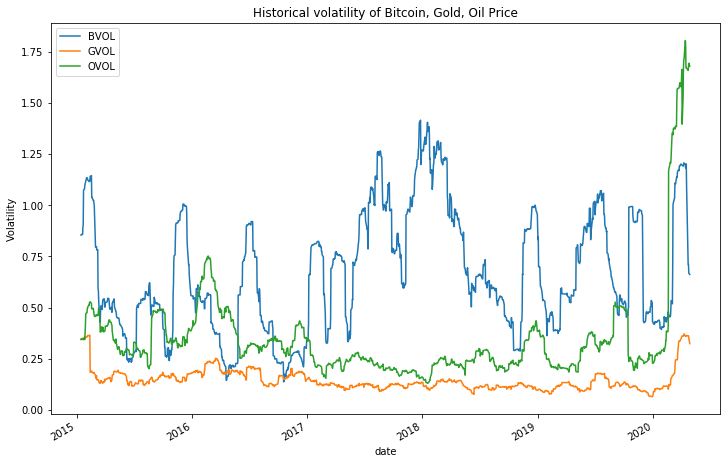

In [3]:
plt.figure(figsize=(12,8))
df.BVOL.plot()
df.GVOL.plot()
df.OVOL.plot()
plt.legend()
plt.title('Historical volatility of Bitcoin, Gold, Oil Price')
plt.ylabel('Volatility')
plt.show()

## Plotting Daily Returns of Bitcoin, Gold, Oil and S&P500 index

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

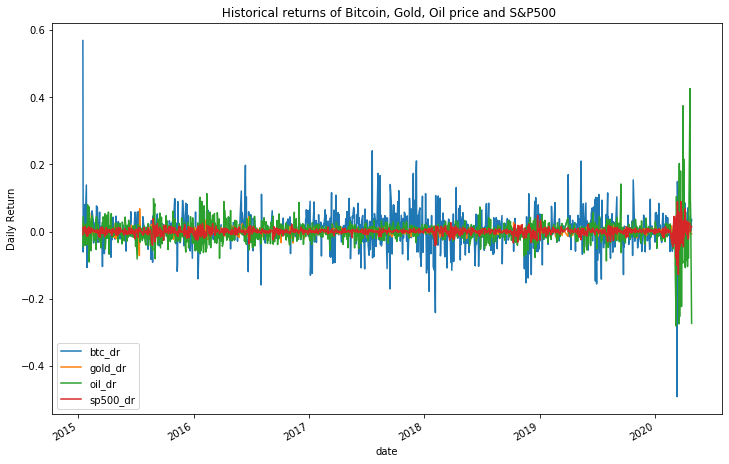

In [4]:
plt.figure(figsize=(12,8))
df.btc_dr.plot()
df.gold_dr.plot()
df.oil_dr.plot()
df.sp500_dr.plot()
plt.legend()
plt.title(' Historical returns of Bitcoin, Gold, Oil price and S&P500')
plt.ylabel('Daily Return')
plt.show()

### Correlation between the Daily Returns and VIX index

In [16]:
corr = df[['btc_dr','gold_dr','oil_dr','sp500_dr','VIX']].corr()
corr

,btc_dr,gold_dr,oil_dr,sp500_dr,VIX
btc_dr,1.000000,0.081854,0.050447,0.137724,-0.056635
gold_dr,0.081854,1.000000,0.084040,0.006887,0.025655
oil_dr,0.050447,0.084040,1.000000,0.202824,-0.132677
sp500_dr,0.137724,0.006887,0.202824,1.000000,-0.176497
VIX,-0.056635,0.025655,-0.132677,-0.176497,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

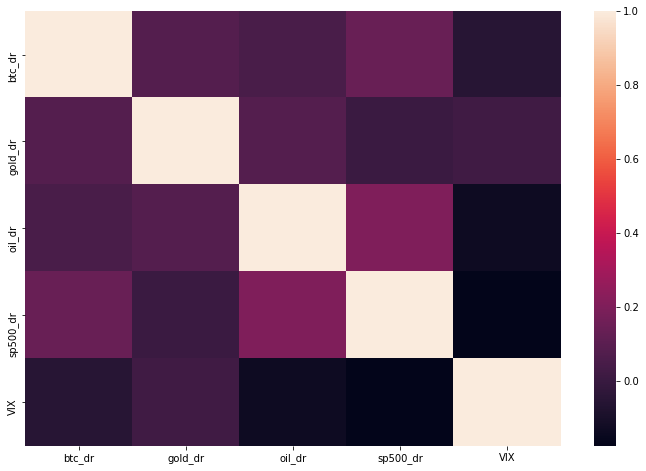

In [18]:
plt.figure(figsize = (12,8))
sns.heatmap(corr)
plt.show()

In [6]:
sub_df = df[['btc_dr','gold_dr','oil_dr','sp500_dr']]
sub_df.head()

,btc_dr,gold_dr,oil_dr,sp500_dr
date,,,,
2015-01-15,0.568670,0.021141,-0.044705,-0.009291
2015-01-16,-0.060548,0.008905,0.044705,0.013335
2015-01-20,0.041924,0.009116,-0.035688,0.001549
2015-01-21,0.080826,0.000726,0.022402,0.004720
2015-01-22,0.003585,0.008524,-0.040953,0.015154


In [7]:
from statsmodels.graphics import tsaplots
def tsplot(y,title,lags=None,figsize=(12,8)):
    
    fig = plt.figure(figsize=figsize)
    layout=(2,2)
    ts_ax = plt.subplot2grid(layout,(0,0))
    hist_ax = plt.subplot2grid(layout,(0,1))
    acf_ax = plt.subplot2grid(layout,(1,0))
    pacf_ax = plt.subplot2grid(layout,(1,1))
    
    y.plot(ax= ts_ax)
    ts_ax.set_title(title,fontsize=14,fontweight='bold')
    y.plot(ax=hist_ax,kind='hist',bins=25)
    hist_ax.set_title('Histogram')
    tsaplots.plot_acf(y,lags=lags,ax=acf_ax)
    tsaplots.plot_pacf(y,lags=lags,ax=pacf_ax)
    sns.despine()
    plt.tight_layout()
    plt.show()
    return ts_ax,acf_ax,pacf_ax

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

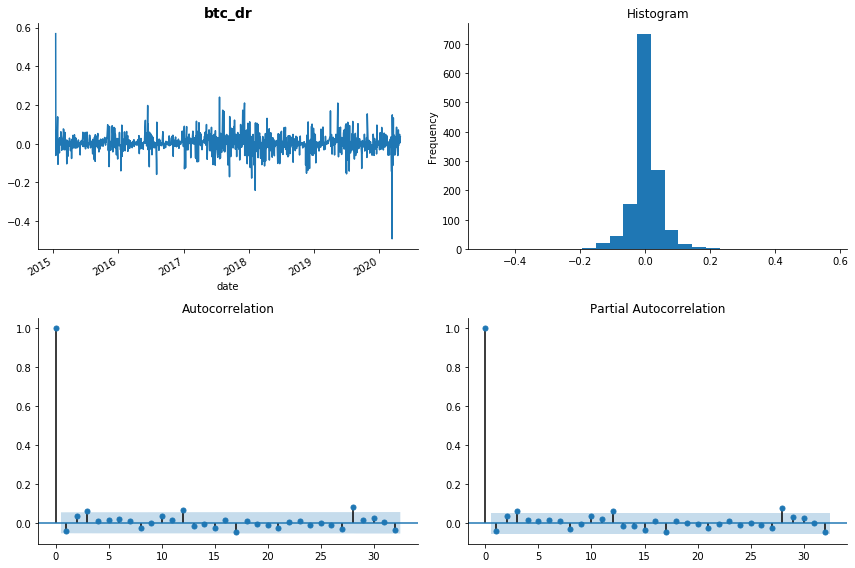

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

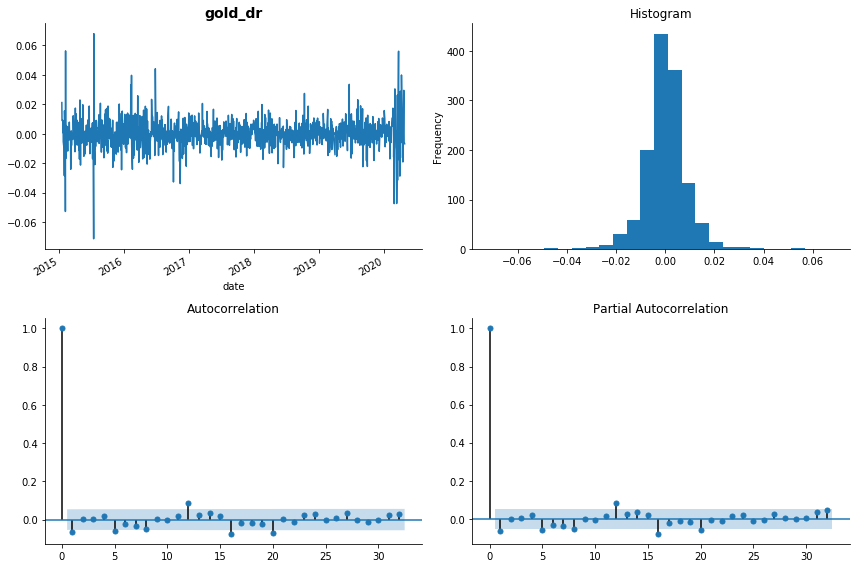

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

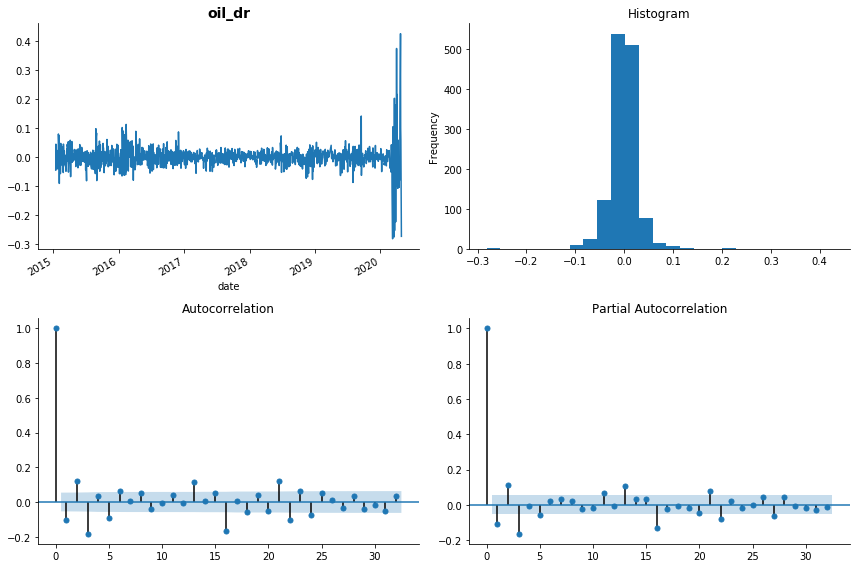

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

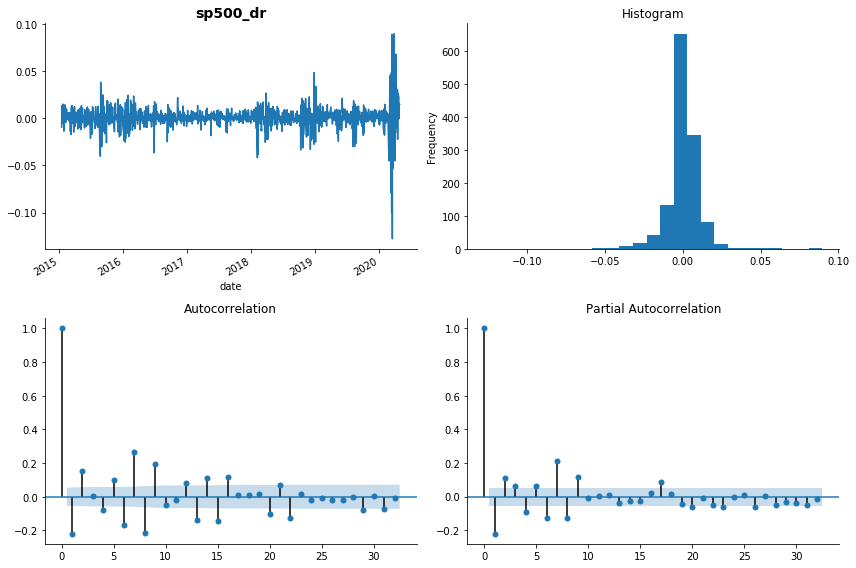

In [8]:
for col in sub_df.columns:
    _ = tsplot(sub_df[col],col)

In [9]:
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error

We split dataset set into training data and test data. Testing data consist last 3 months (February 2020, March 2020, April 2020) data and training data consist rest of the dataset.

In [10]:
test_data = pd.concat([df['2020-02'],df['2020-03'],df['2020-04']],axis=0)
train_data = df[:-len(test_data)]
test_data = test_data.reset_index()
train_data = train_data.reset_index()

<IPython.core.display.Javascript object>

The ARMAX Model : 
    ![alt text](armax.jpg)
    
ARMAX (p, q, b) model from Baillie (1980) to explain Bitcoin returns
using Equation (2), where p is autoregressive term, q is moving average term and b is exogenous inputs term.

<b>What is an exogenous variable?</b>
<br><br>
Well, X is the exogenous variable and it can be any variable we’re interested in.
<br><br>
It can be a time-varying measurement like the inflation rate or the price of a different index. Or a categorical variable separating the different days of the week. It can also be a Boolean accounting for the special festive periods. Finally, it can stand for a combination of several different external factors.
<br><br>
The idea is that it can be any other variable or variables that can affect prices, as long as we have the data available.
Such outside factors are known as exogenous variables in our regression. We use their values to predict and explain the one we’re interested in, which happens to be current prices in our case.

Here we take <b>gold daily return (gold_dr)</b> as a <b>exogeneous</b> Input and Forcast future bitcoin daily result.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

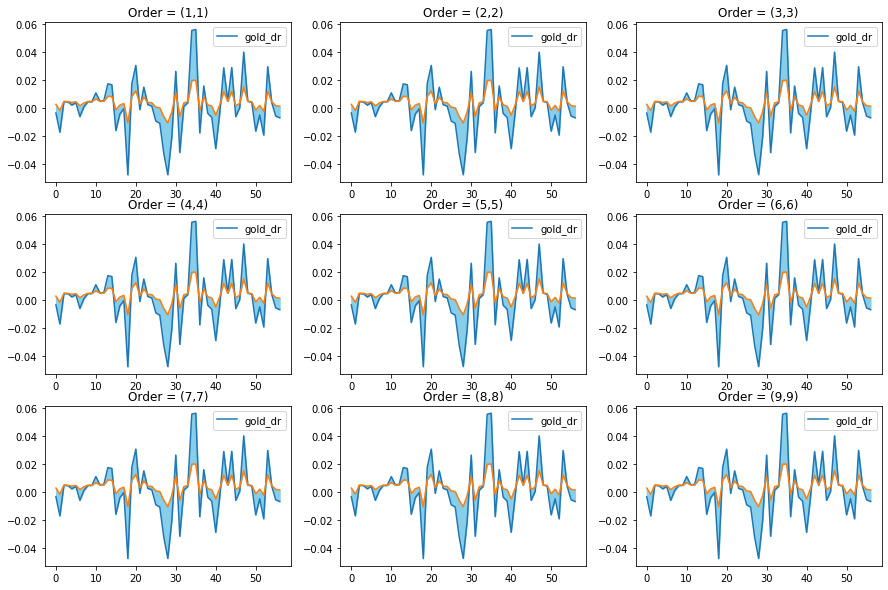

In [11]:
plt.figure(figsize=(15,10))
layout=(3,3)
axis = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]
for i in range(1,10) :
    model = ARMA(train_data['btc_dr'], order=(1,1), exog=train_data.gold_dr)
    result = model.fit()
    #prediction = result.predict(start=0,exog=test_data.gold_dr)
    #print('MAE for Training Dataset : ',np.sqrt(mean_squared_error(train_data.btc_dr,prediction)))
    forecast = result.forecast(steps= len(test_data),exog=test_data.gold_dr)
    #print('MAE for forcasted Values : ',np.sqrt(mean_squared_error(test_data.btc_dr,forecast[0])))
    ts_ax = plt.subplot2grid(layout,axis[i-1])
    test_data.gold_dr.plot(ax=ts_ax)
    ts_ax.plot(forecast[0])
    ts_ax.legend()
    plt.fill_between(test_data.index,test_data.gold_dr,forecast[0],color='skyblue')
    ttl = 'Order = ('+ str(i) +','+ str(i) + ')'
    ts_ax.set_title(ttl)
plt.show()

Here we take <b>oil daily return (oil_dr)</b> as a <b>exogeneous</b> Input and Forcast future bitcoin daily result.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

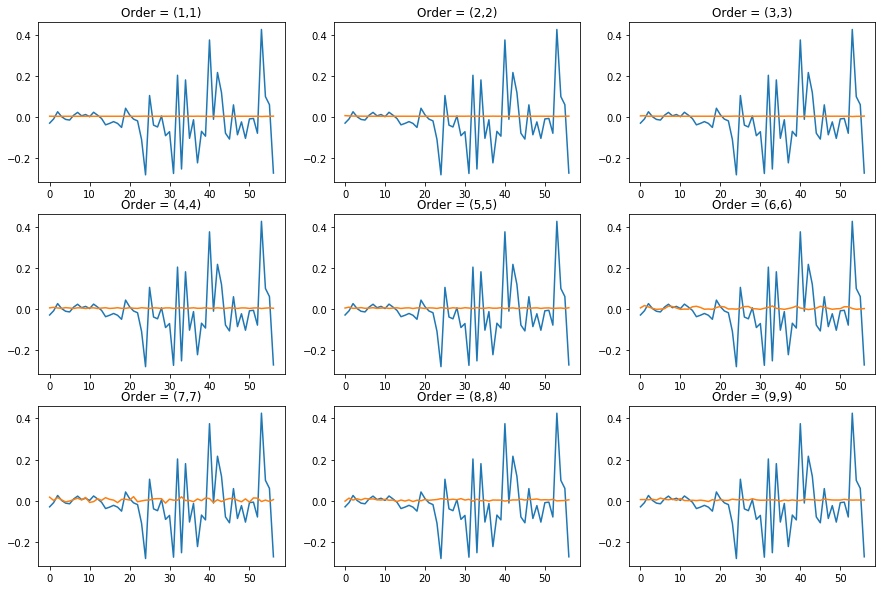

In [12]:
plt.figure(figsize=(15,10))
layout=(3,3)
axis = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]
for i in range(1,10) :
    model = ARMA(train_data['btc_dr'], order=(i,i), exog=train_data.oil_dr)
    result = model.fit()
    #prediction = result.predict(start=0,exog=test_data.oil_dr)
    #print('MAE for Training Dataset : ',np.sqrt(mean_squared_error(train_data.btc_dr,prediction)))
    forecast = result.forecast(steps= len(test_data),exog=test_data.oil_dr)
    #print('MAE for forcasted Values : ',np.sqrt(mean_squared_error(test_data.btc_dr,forecast[0])))
    ts_ax = plt.subplot2grid(layout,axis[i-1])
    test_data.oil_dr.plot(ax=ts_ax)
    ts_ax.plot(forecast[0])
    ttl = 'Order = ('+ str(i) +','+ str(i) + ')'
    ts_ax.set_title(ttl)
plt.show()

Here we take <b>s$\&$p500 index daily return (sp500_dr)</b> as a <b>exogeneous</b> Input and Forcast future bitcoin daily result.

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

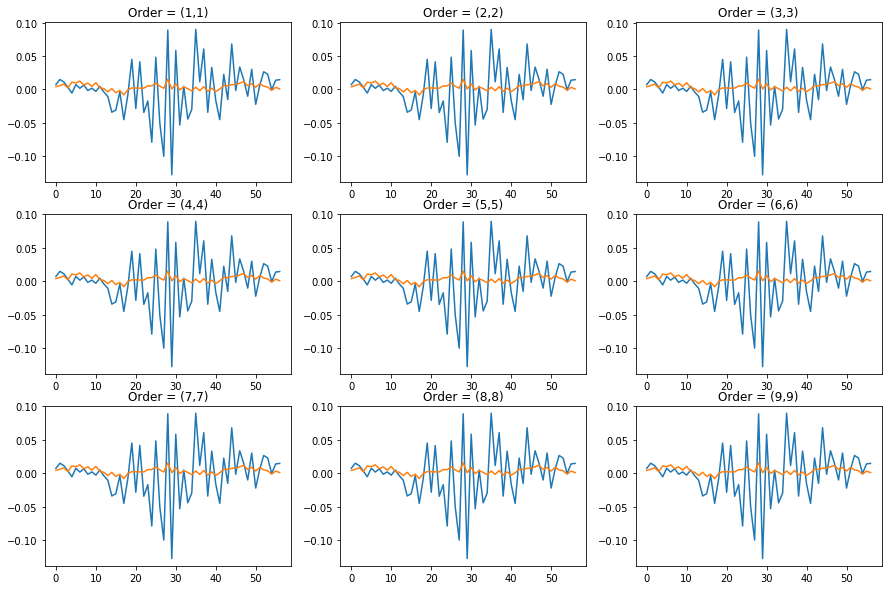

In [13]:
plt.figure(figsize=(15,10))
layout=(3,3)
axis = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]
for i in range(1,10) :
    model = ARMA(train_data['btc_dr'], order=(8,8), exog=train_data.sp500_dr)
    result = model.fit()
    #prediction = result.predict(start=0,exog=test_data.sp500_dr)
    #print('MAE for Training Dataset : ',np.sqrt(mean_squared_error(train_data.btc_dr,prediction)))
    forecast = result.forecast(steps= len(test_data),exog=test_data.sp500_dr)
    #print('MAE for forcasted Values : ',np.sqrt(mean_squared_error(test_data.btc_dr,forecast[0])))
    ts_ax = plt.subplot2grid(layout,axis[i-1])
    test_data.sp500_dr.plot(ax=ts_ax)
    ts_ax.plot(forecast[0])
    ttl = 'Order = ('+ str(i) +','+ str(i) + ')'
    ts_ax.set_title(ttl)
plt.show()

Here we take <b>VIX index (VIX)</b> as a <b>exogeneous</b> Input and Forcast future bitcoin daily result.

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

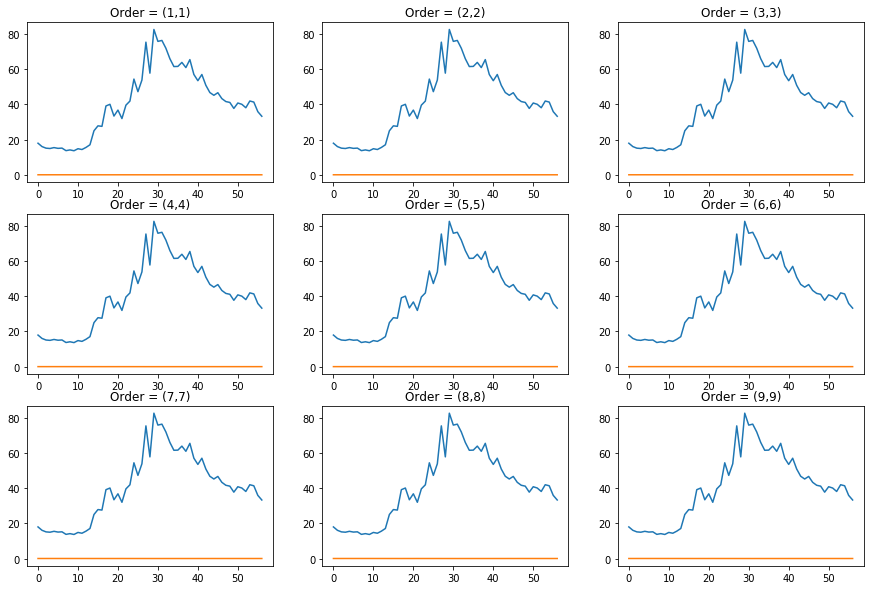

In [14]:
plt.figure(figsize=(15,10))
layout=(3,3)
axis = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]
for i in range(1,10) :
    var = train_data.VIX
    model = ARMA(train_data['btc_dr'], order=(5,5), exog=var)
    result = model.fit()
    #prediction = result.predict(start=0,exog=var)
    #print('MAE for Training Dataset : ',np.sqrt(mean_squared_error(train_data.btc_dr,prediction)))
    forecast = result.forecast(steps= len(test_data),exog=test_data.VIX)
    #print('MAE for forcasted Values : ',np.sqrt(mean_squared_error(test_data.btc_dr,forecast[0])))
    ts_ax = plt.subplot2grid(layout,axis[i-1])
    test_data.VIX.plot(ax=ts_ax)
    ts_ax.plot(forecast[0])
    ttl = 'Order = ('+ str(i) +','+ str(i) + ')'
    ts_ax.set_title(ttl)
plt.show()

### Results :

     From the above we can clearly see that Gold prices daily return as a exogeneous variable in the ARMAX model are more likly to forecast the direction of Daily Return of the Bitcoin prices. VIX index clearly fail to forecast the future values of the bitcoin daily return.
     The s&p500 index is also able to give us direction of furture bitcoin daily return and for ARMAX of order (8,8) oil prices are also able to give us the direction of future bitcoin daily return weather it is going up or down. 